In [4]:
import numpy as np
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
import os
import cv2
from matplotlib import pyplot as plt

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
data_dir = r"/mnt/c/Documents and Settings/nickk/projects/dogs/PetImages"
log_dir = r"/mnt/c/Documents and Settings/nickk/projects/dogs/logs"
os.listdir(data_dir)

['cats', 'dogs']

In [6]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 10028 files belonging to 2 classes.


2024-01-24 18:38:18.341187: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

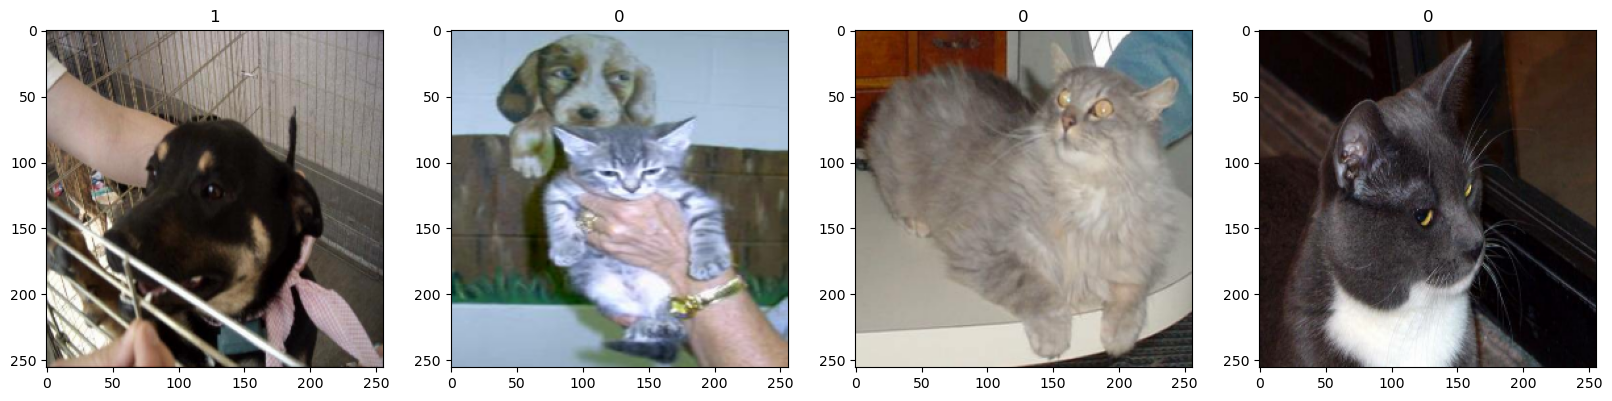

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data_scaled = data.map(lambda x, y: (x/255, y))

In [11]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = len(data) - train_size - val_size

In [12]:
train_data = data_scaled.take(train_size)
val_data = data_scaled.skip(train_size).take(val_size)
test_data = data_scaled.skip(train_size + val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))




In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_5 (Bat  (None, 125, 125, 64)     

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [18]:
hist = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20


2024-01-24 18:38:20.154011: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-24 18:38:20.475164: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-24 18:38:20.699547: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-24 18:38:22.428703: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb3d1129e80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-24 18:38:22.428749: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-01-24 18:38:22.432918: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash

219/219 [==============================] - 34s 132ms/step - loss: 0.8502 - accuracy: 0.6096 - val_loss: 2.7922 - val_accuracy: 0.4904
Epoch 2/20
219/219 [==============================] - 29s 130ms/step - loss: 0.6101 - accuracy: 0.6861 - val_loss: 0.7300 - val_accuracy: 0.5766
Epoch 3/20
219/219 [==============================] - 29s 130ms/step - loss: 0.5303 - accuracy: 0.7342 - val_loss: 0.6098 - val_accuracy: 0.7016
Epoch 4/20
219/219 [==============================] - 28s 129ms/step - loss: 0.4868 - accuracy: 0.7657 - val_loss: 0.5931 - val_accuracy: 0.7107
Epoch 5/20
219/219 [==============================] - 28s 129ms/step - loss: 0.4324 - accuracy: 0.7971 - val_loss: 1.0732 - val_accuracy: 0.6638
Epoch 6/20
219/219 [==============================] - 29s 130ms/step - loss: 0.3975 - accuracy: 0.8213 - val_loss: 0.9070 - val_accuracy: 0.6381
Epoch 7/20
219/219 [==============================] - 29s 131ms/step - loss: 0.3437 - accuracy: 0.8520 - val_loss: 0.7497 - val_accuracy: 0.7

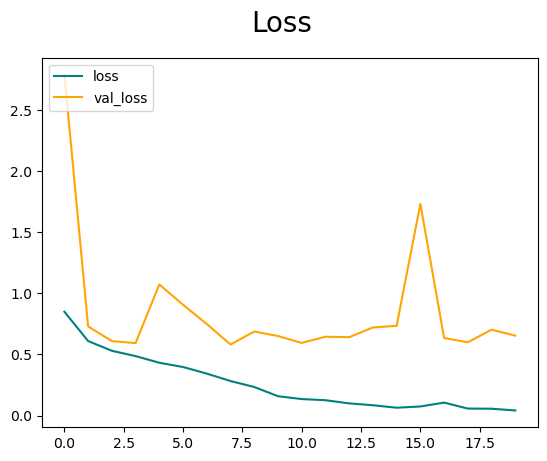

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

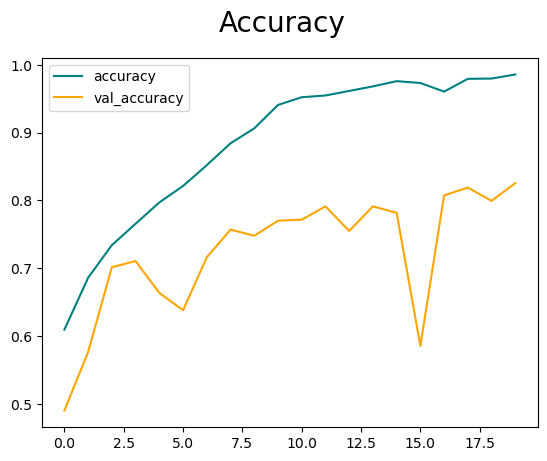

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
len(data)

314

1/1 [==============================] - 0s 396ms/step
[[0.9992323]]


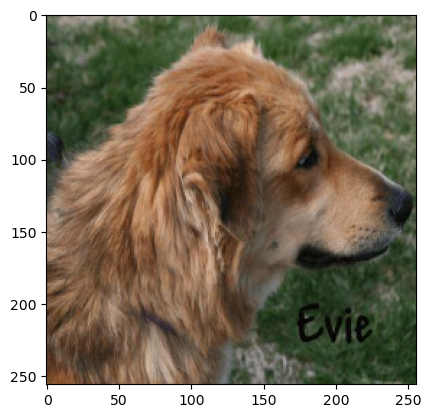

1/1 [==============================] - 0s 9ms/step
[[0.9996977]]


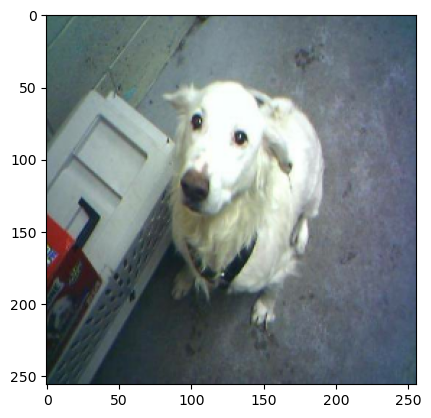

1/1 [==============================] - 0s 10ms/step
[[0.008612]]


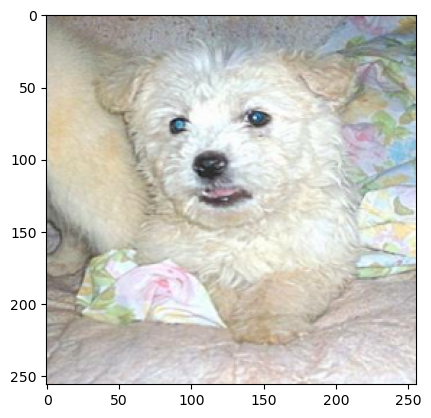

1/1 [==============================] - 0s 10ms/step
[[0.9086269]]


KeyboardInterrupt: 

In [22]:
for i in range(16):
    image = test_data.as_numpy_iterator().next()[0][i]
    print(model.predict(np.expand_dims(image, 0)))
    image = image * 255
    plt.imshow(image.astype(int))
    plt.show()